# Tensorflow 1
## Simple Linear Model

### Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Tensorflow version at the time of developing this code
tf.__version__

'1.5.0'

### Load Data
The MNIST data-set consists of 70.000 images and associated labels (i.e. classifications of the images). The data-set is split into 3 mutually exclusive sub-sets.

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/',one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
print('Training data volume: ', len(data.train.labels))
print('Testing data volume: ', len(data.test.labels))
print('Validation data volume: ', len(data.validation.labels))

Training data volume:  55000
Testing data volume:  10000
Validation data volume:  5000


In [5]:
# Defining numeric class labels
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [6]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

### Data Dimensions

In [7]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

### Helper function for plotting images

In [8]:
def plot_images(images, cls_true, cls_pred=None):
    fig, axes = plt.subplots(3, 3)
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

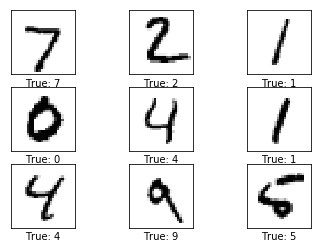

In [9]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
plot_images(images, cls_true)

## Building Tensorflow Graph

In [10]:
X = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])
W = tf.Variable(tf.zeros([img_size_flat, num_classes]))
b = tf.Variable(tf.zeros([num_classes]))

In [11]:
linear_transformation = tf.matmul(X, W) + b
y_pred = tf.nn.softmax(linear_transformation, axis=0)
y_pred_cls = tf.argmax(y_pred, axis=-1)

In [12]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=linear_transformation,
                                                        labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



### Performance Measures

In [13]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
# Creating tf session
sess = tf.Session()

# Initialize Variables
sess.run(tf.global_variables_initializer())

In [15]:
batch_size = 100
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_train = {X: x_batch, y_true: y_true_batch}
        sess.run(optimizer, feed_dict=feed_dict_train)

In [70]:
feed_dict_test = {X: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls} # Experiment commenting

In [71]:
def print_accuracy():
    acc = sess.run(accuracy, feed_dict=feed_dict_test)
    print('Accuracy on test data set: {0:.1%}'.format(acc) )

In [87]:
def print_confusion_matrix():
    # Get true classifications
    cls_true = data.test.cls
    
    # Get predicted classifications
    cls_pred = sess.run(y_pred_cls, feed_dict=feed_dict_test) # Experimint feed_dict
    
    # Confusion matrix using sklearn
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    
    # Print cm as test
    print(cm)
    
    # Plot cm as image
    plt.imshow(cm, cmap=plt.cm.Blues)
    
    plt.tight_layout()
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()

In [88]:
def plot_errors():
    correct, cls_pred = sess.run([correct_prediction, y_pred_cls], feed_dict=feed_dict_test)
    incorrect = (correct == False)
    images = data.test.images[incorrect]
    cls_pred = cls_pred[incorrect]
    cls_true = data.test.cls[incorrect]
    plot_images(images[0:9], cls_true[0:9], cls_pred[0:9])

In [89]:
def plot_weights():
    Weights = sess.run(W)
    w_min = np.min(Weights)
    w_max = np.max(Weights)
    fig, axes = plt.subplots(3, 4)
    
    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = Weights[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [90]:
# Performance before any Optimization
print_accuracy()

Accuracy on test data set: 73.3%


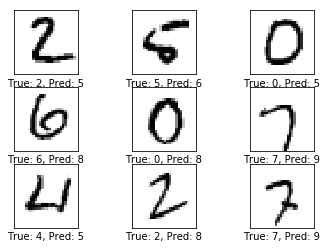

In [91]:
plot_errors()

In [92]:
optimize(num_iterations=1)

In [93]:
print_accuracy()

Accuracy on test data set: 72.5%


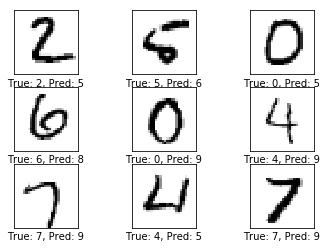

In [94]:
plot_errors()

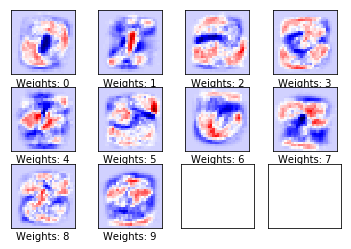

In [95]:
plot_weights()

In [96]:
optimize(num_iterations=990)

In [97]:
print_accuracy()

Accuracy on test data set: 73.5%


In [98]:
print(sess.run(cost, feed_dict=feed_dict_test))

0.2785445


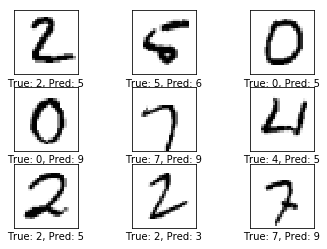

In [99]:
plot_errors()

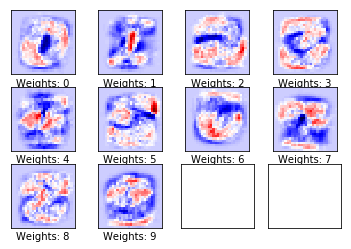

In [100]:
plot_weights()

[[ 444    0    0   16    2  354   21    0   51   92]
 [   0 1128    0    2    0    1    0    0    3    1]
 [   1  190  406  113   11   33   22    4  181   71]
 [   0   36    0  806    1   65    0    1   34   67]
 [   0   11    0    0  703    2    3    0    4  259]
 [   0   17    0   11    3  783    6    1   35   36]
 [   0   20    0    2   26   51  826    0   15   18]
 [   0   40    2    2    4    1    0  471    2  506]
 [   0   57    0    7    6   27    2    1  801   73]
 [   0   10    0    3    2    6    1    0    5  982]]


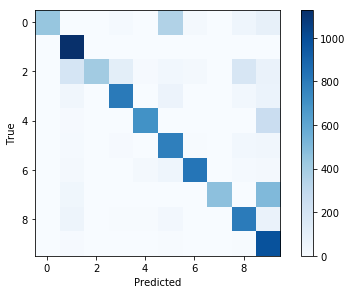

In [101]:
print_confusion_matrix()